In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

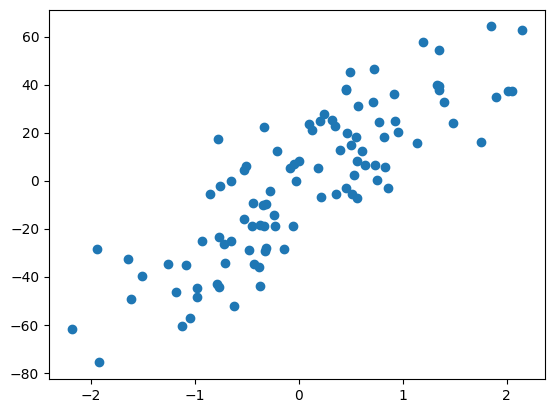

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [6]:
from sklearn.linear_model import Ridge

In [12]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [13]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


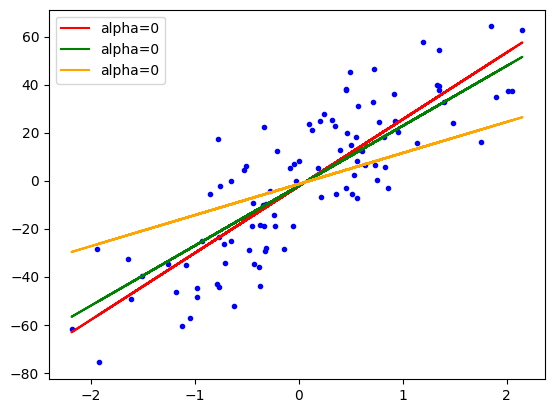

In [15]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=0')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=0')
plt.legend()

In [21]:
class MeraRidge:

  def __init__(self,alpha=0.1):
    self.alpha = alpha
    self.m = None
    self.b = None

  def fit(self,X_train,y_train):

    num = 0
    den = 0

    for i in range(X_train.shape[0]):
      num = num + (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
      den = den + (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())

    self.m = num/(den + self.alpha)
    self.b = y_train.mean() - (self.m * X_train.mean())
    print(self.m,self.b)

  def predict(self,X_test):
    pass

In [24]:
reg = MeraRidge(alpha=100)

In [25]:
reg.fit(X,y)

[12.93442104] [-1.42484415]


In [28]:
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes

In [29]:
X,y = load_diabetes(return_X_y=True)

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [33]:
from sklearn.linear_model import Ridge

In [34]:
reg = Ridge(alpha=0.1,solver='cholesky')

In [35]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [37]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [38]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [41]:
class MeraRidge:

  def __init__(self,alpha=0.1):

    self.alpha = alpha
    self.coef_ = None
    self.intercept_ = None

  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)
    I = np.identity(X_train.shape[1])
    result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
    self.intercept_ = result[0]
    self.coef_= result[1:]


  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_

In [43]:
reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.46921361559931885
[  44.04252774 -241.72019592  452.99153345  332.06044266  -76.32617866
  -68.54884462 -165.01664054  149.93980143  431.59483654   58.54419942]
150.84762720023167
